In [3]:
from caption_ds import OSMTilesDataset
from datasets import load_dataset
from itertools import product
from functional import seq
import pandas as pd

In [ ]:
ds = OSMTilesDataset("data")
len(ds)


In [ ]:
hds = ds.to_huggingface(keep_in_memory=True)
hds

In [2]:



ds = load_dataset("data/tiles/Wrocław, PL/")

Resolving data files:   0%|          | 0/2145 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /home/marcin/.cache/huggingface/datasets/imagefolder/Wrocław, PL-044a1e0227ebe884/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

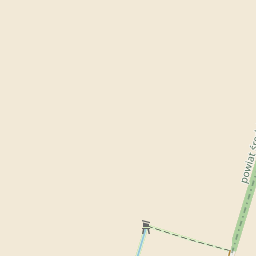

In [33]:
ds["train"][0]["image"]

In [6]:

def _flatten_tags(tags):
    tags_flat = (
        seq(tags.items())
        .starmap(lambda k, v: product([k], v if isinstance(v, list) else [v]))
        .flatten()
        .map(lambda x: "_".join(x))
        .list()
    )
    return tags_flat
columns = _flatten_tags(HEX2VEC_FILTER)
len(columns)

725

In [8]:


df = pd.read_pickle("data/embeddings/Wrocław, PL.pkl")
df["file_name"] = df.apply(lambda row: f"{row.name[0]}_{row.name[1]}.png", axis=1)
df = df.set_index("file_name")
df = df.reindex(columns=columns, fill_value=0)
df.to_csv("data/tiles/Wrocław, PL/metadata.csv")

aeroway_aerodrome         1
aeroway_apron             3
aeroway_gate              8
aeroway_hangar            1
aeroway_helipad           1
                         ..
waterway_tidal_channel    0
waterway_turning_point    0
waterway_water_point      0
waterway_waterfall        1
waterway_weir             4
Length: 725, dtype: int64

In [12]:
import os
import pandas as pd
from tqdm import tqdm

for city in tqdm(os.listdir("data/tiles")):
    if os.path.exists(f"data/embeddings/{city}.pkl"):
        df = pd.read_pickle(f"data/embeddings/{city}.pkl")
        df = df.reindex(columns=columns, fill_value=0)
        df["file_name"] = df.apply(lambda row: f"{row.name[0]}_{row.name[1]}.png", axis=1)
        df = df.set_index("file_name")
        df.to_csv(f"data/tiles/{city}/metadata.csv")
    else :
        print(city, "not found")

100%|██████████| 6/6 [00:03<00:00,  1.92it/s]


In [ ]:
hds[0]["img"]

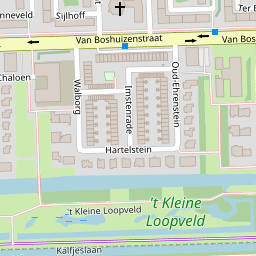

In [ ]:
from PIL import Image

Image.fromarray(ds[0].numpy().astype('uint8').transpose((1,2,0)))

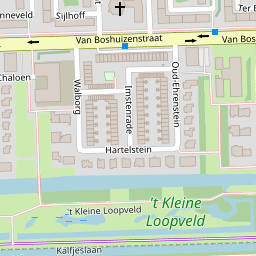

In [ ]:
Image.fromarray(hds[0]["img"].numpy().astype('uint8').transpose((1,2,0)))

In [ ]:

hds.push_to_hub("mprzymus/osm_tiles", private=True)

In [1]:
from osm_dataset import TextToImageDataset


ds = TextToImageDataset("data/tiles/Warszawa, PL/")


Resolving data files:   0%|          | 0/3890 [00:00<?, ?it/s]

Found cached dataset imagefolder (/home/marcin/.cache/huggingface/datasets/imagefolder/Warszawa, PL-46fd99e3d294399c/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/3889 [00:00<?, ? examples/s]

In [2]:
text = ds[40][1]
img = ds[40][0]
# ds.dataset.cleanup_cache_files()

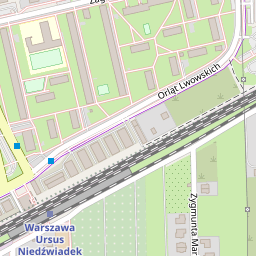

In [3]:
import torchvision.transforms as transforms

transforms.ToPILImage()(img)

In [4]:
ds.dataset.select_columns(["pixel_values", "input_ids"])

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'pixel_values'],
        num_rows: 3889
    })
})

In [11]:
from transformers import CLIPTokenizer
from config import BASE_MODEL_NAME

tokenizer = CLIPTokenizer.from_pretrained(BASE_MODEL_NAME, subfolder="tokenizer")
tokenizer.decode(text)

'<|startoftext|>map of area containing : 9 amenity parkings 1 landuse farmyard 1 amenity kindergarten 1 8 building apartmentss 2 landuse garagess. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>'

In [19]:
tokenizer(
            pd.Series(["123", "42"]).tolist(),
            max_length=tokenizer.model_max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )["input_ids"].squeeze().shape

torch.Size([2, 77])

In [4]:
pd.DataFrame({
    "1": [1,23],
    "12": [2,33]
})

,1,12
0,1,2
1,23,33


In [4]:
ds = load_dataset("../data/tiles/Wrocław, PL")
ds.push_to_hub("mprzymus/osm_tiles_small")

Resolving data files:   0%|          | 0/2145 [00:00<?, ?it/s]

Found cached dataset imagefolder (/home/marcin/.cache/huggingface/datasets/imagefolder/Wrocław, PL-16adbde1af182d57/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/1 [00:00<?, ?it/s]

Pushing split train to the Hub.


Map:   0%|          | 0/2144 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

In [1]:
from osm_dataset import TextToImageDataset

ds = TextToImageDataset("mprzymus/osm_tiles_small")
ds


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/2144 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /home/marcin/.cache/huggingface/datasets/mprzymus___parquet/mprzymus--osm_tiles_small-199229e0bb266c92/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2144 [00:00<?, ? examples/s]

In [ ]:
ds[0]